In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('/Top 1000 technology companies.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


,Ranking
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Top 1000 technology companies.csv')


df['Market Cap'] = df['Market Cap'].astype(str)
cleaned_Market_cap = df['Market Cap'].str.replace('&', '').str.replace('\n', '').str.replace(',', '').str.replace('$','') # Remove dollar signs


def convert_market_cap(market_cap_str):
    if 'T' in market_cap_str:
        return float(market_cap_str.replace('T', '')) * 1000000000000
    elif 'B' in market_cap_str:
            return float(market_cap_str.replace('B', '')) * 1000000000
    elif 'M' in market_cap_str:
            return float(market_cap_str.replace('M', '')) * 1000000
    else:
            return float(market_cap_str)

cleaned_market_cap = cleaned_Market_cap.apply(convert_market_cap)
market_cap_in_billions = cleaned_market_cap / 1000000000
df['Market Cap'] = market_cap_in_billions
df.head()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,2866.00,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,2755.00,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,1186.00,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,495.95,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,487.64,2330,Taiwan,Technology,Semiconductors


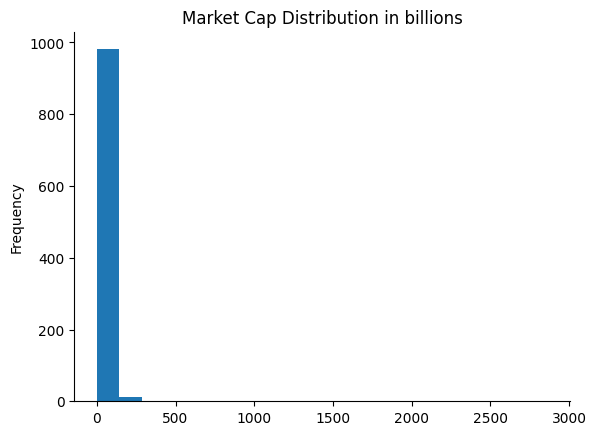

In [11]:
# showing Market cap Distribution in billions

from matplotlib import pyplot as plt
df['Market Cap'].plot(kind='hist', bins=20, title='Market Cap Distribution in billions')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
#Number of companies by country

In [21]:
palette_names=sns.palettes.SEABORN_PALETTES
print(palette_names)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

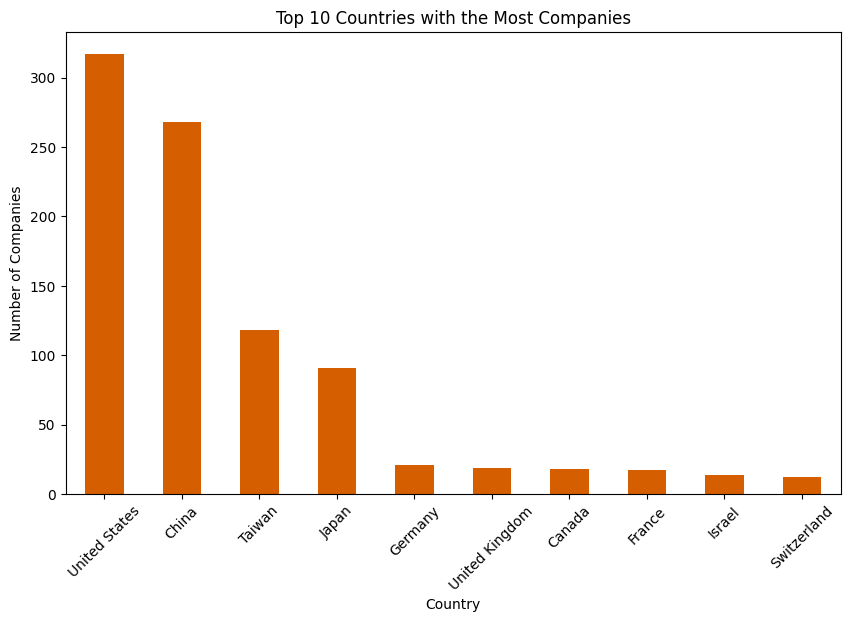

In [24]:
plt.figure(figsize=(10, 6))
df['Country'].value_counts().head(10).plot(kind='bar', color=('#D55E00'))
plt.title('Top 10 Countries with the Most Companies')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Top 10 companies by market CAP

In [28]:
print(df.columns)

Index(['Ranking', 'Company', 'Market Cap', 'Stock', 'Country', 'Sector',
       'Industry'],
      dtype='object')


<ipython-input-42-d8b6a73ce355>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market Cap', y='Company', data=top_10, palette='viridis', width=0.7)


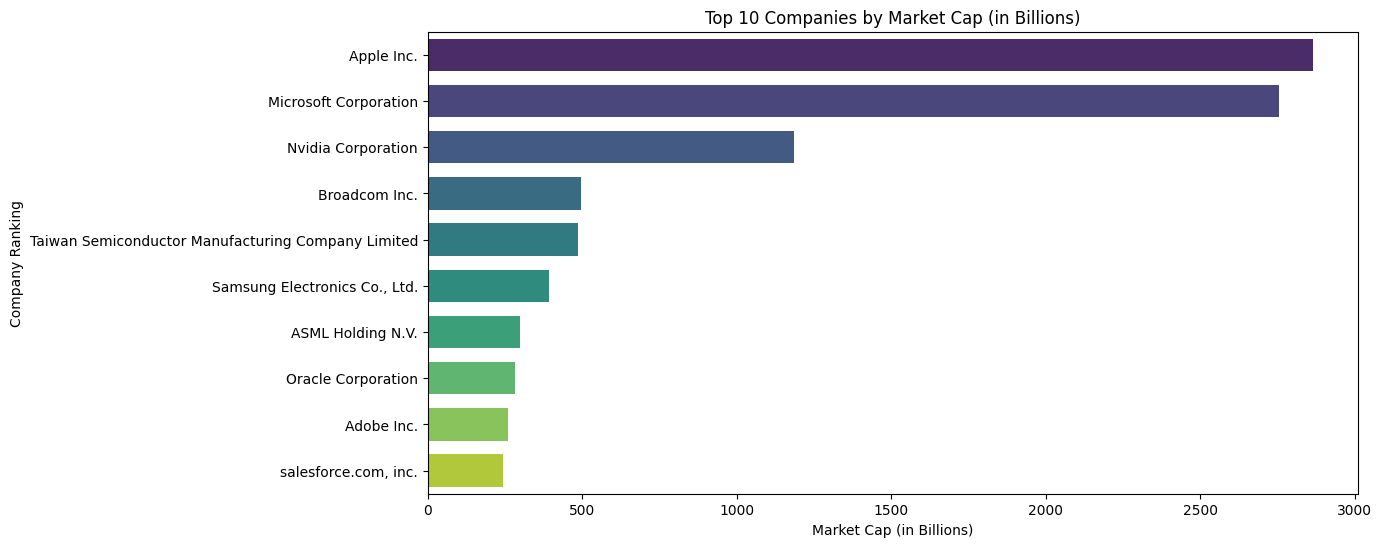

In [42]:
top_10 = df[['Ranking', 'Company', 'Market Cap']].head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Market Cap', y='Company', data=top_10, palette='viridis', width=0.7)
plt.title('Top 10 Companies by Market Cap (in Billions)')
plt.xlabel('Market Cap (in Billions)')
plt.ylabel('Company Ranking')
plt.show()

In [43]:
#show the companies sectors and how industries are distributed across

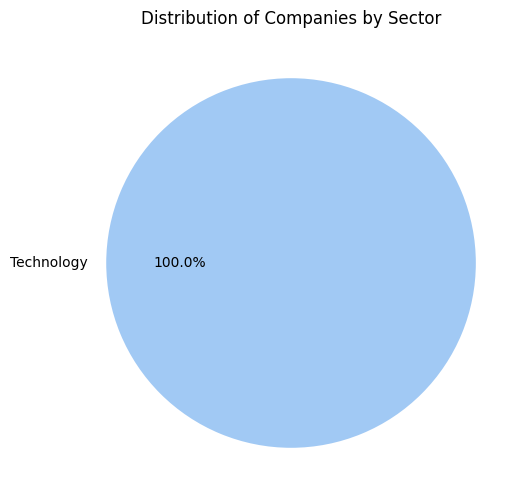

In [47]:
plt.figure(figsize=(10, 6))
df['Sector'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Companies by Sector')
plt.ylabel('')
plt.show()

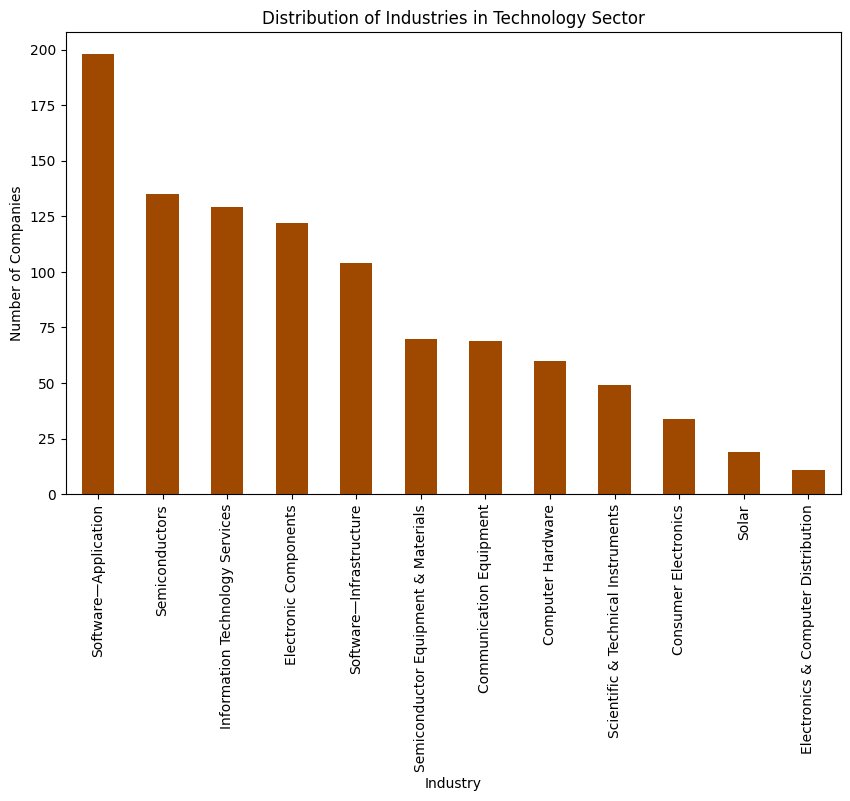

In [59]:
plt.figure(figsize=(10, 6))
industries= df[df['Sector']== 'Technology']['Industry'].value_counts()
industries.plot(kind='bar', color='#9F4800')
plt.title('Distribution of Industries in Technology Sector')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

In [ ]:
`